<a href="https://colab.research.google.com/github/hayatoy/tflite-examples/blob/master/TensorFlow_Lite_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download model, label and sample image

In [0]:
%%bash
export DATA_DIR="/tmp"
cd ${DATA_DIR}
curl -O https://raw.githubusercontent.com/google-coral/edgetpu/master/test_data/deeplabv3_mnv2_dm05_pascal_quant.tflite
curl -O https://raw.githubusercontent.com/google-coral/edgetpu/master/test_data/pets.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  733k  100  733k    0     0  2969k      0 --:--:-- --:--:-- --:--:-- 2969k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  166k  100  166k    0     0   901k      0 --:--:-- --:--:-- --:--:--  896k


In [0]:
!ls -la /tmp

total 912
drwxrwxrwt 1 root root   4096 Apr 17 02:40 .
drwxr-xr-x 1 root root   4096 Apr 17 02:21 ..
-rw-r--r-- 1 root root 751064 Apr 17 02:51 deeplabv3_mnv2_dm05_pascal_quant.tflite
-rw-r--r-- 1 root root 170711 Apr 17 02:51 pets.jpg


## Run inference

In [0]:
def set_input_tensor(interpreter, image):
  """Sets the input tensor."""
  tensor_index = interpreter.get_input_details()[0]['index']
  input_tensor = interpreter.tensor(tensor_index)()[0]
  input_tensor[:, :] = image


def get_output_tensor(interpreter, index):
  """Returns the output tensor at the given index."""
  output_details = interpreter.get_output_details()[index]
  tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
  return tensor

In [0]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/tmp/deeplabv3_mnv2_dm05_pascal_quant.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)

# Input image data
input_shape = input_details[0]['shape']
image = Image.open('/tmp/pets.jpg').convert('RGB').resize((input_shape[1], input_shape[2]), Image.ANTIALIAS)
set_input_tensor(interpreter, image)

# Run inference
interpreter.invoke()

# Get output details
seg = get_output_tensor(interpreter, 0)

[{'name': 'MobilenetV2/MobilenetV2/input', 'index': 6, 'shape': array([  1, 513, 513,   3], dtype=int32), 'shape_signature': array([  1, 513, 513,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0078125, 128), 'quantization_parameters': {'scales': array([0.0078125], dtype=float32), 'zero_points': array([128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'ArgMax', 'index': 0, 'shape': array([  1, 513, 513], dtype=int32), 'shape_signature': array([  1, 513, 513], dtype=int32), 'dtype': <class 'numpy.int64'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


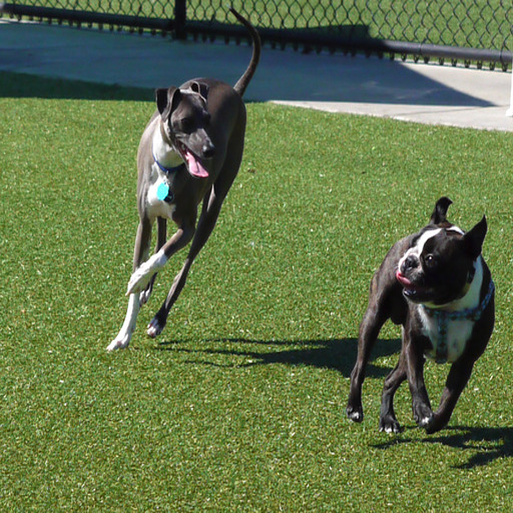

In [0]:
image

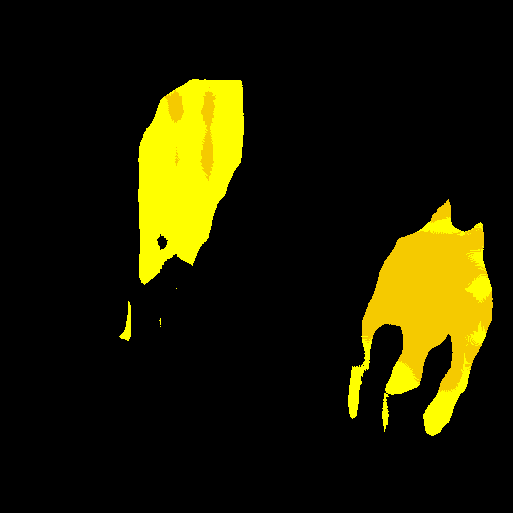

In [0]:
from matplotlib import cm
my_cm = cm.get_cmap('gnuplot')
normed_data = seg / seg.max()
mapped_data = my_cm(normed_data, bytes=True)
mask = Image.fromarray(mapped_data, mode="RGBA")
mask

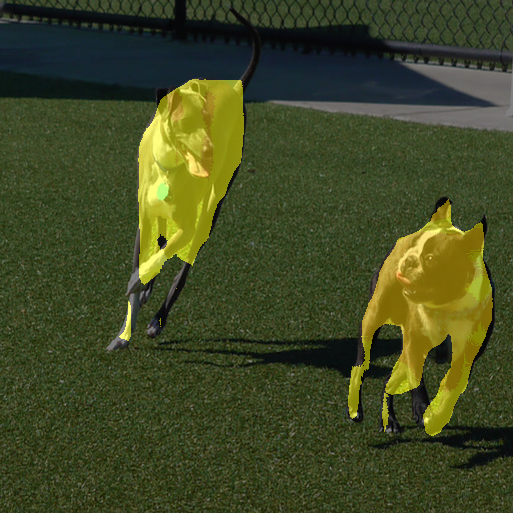

In [0]:
Image.blend(image.convert("RGBA"), mask, 0.5)